# Assignment 1 - INF367

In [74]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator, QasmSimulator
from qiskit.visualization import array_to_latex, plot_histogram
import numpy as np
import qiskit.quantum_info as qi
from qiskit.quantum_info import Statevector, Operator


# To be used for measurments

backend = QasmSimulator()
def measure(qc: QuantumCircuit, shots=1000):
    qc.measure_all()
    transpiled_qc = transpile(qc, backend)
    job = backend.run(transpiled_qc, shots=shots)
    result = job.result()
    return result.get_counts()

### 1.1 Playing with Quantum Circuits

1. Implement circuit to produce  |ψ⟩ = 1√2 ( |RRLL⟩ − |LLRR⟩ )

In [60]:
qc = QuantumCircuit(4)

qc.h(3)
qc.h(2)
qc.h(1)
qc.h(0)

qc.u(np.pi*2.5, np.pi*2.5, np.pi*2,1)

qc.cx(0,1)
qc.cx(2,1)
qc.cx(3,2)

statevector = Statevector(qc)
x = Operator(qc).to_matrix()

display(statevector.draw('latex'))
display(qc.draw(reverse_bits=True))
display(array_to_latex(x))


<IPython.core.display.Latex object>

┌───┐                                  
q_3: ┤ H ├───────────────────────────────■──
     ├───┤                             ┌─┴─┐
q_2: ┤ H ├──────────────────────────■──┤ X ├
     ├───┤┌─────────────────┐┌───┐┌─┴─┐└───┘
q_1: ┤ H ├┤ U(5π/2,5π/2,2π) ├┤ X ├┤ X ├─────
     ├───┤└─────────────────┘└─┬─┘└───┘     
q_0: ┤ H ├─────────────────────■────────────
     └───┘

<IPython.core.display.Latex object>

2. Full standard measurment

In [61]:
res = measure(qc, shots=1000)


Circuit:


┌───┐                                   ░          ┌─┐
   q_3: ┤ H ├───────────────────────────────■───░──────────┤M├
        ├───┤                             ┌─┴─┐ ░       ┌─┐└╥┘
   q_2: ┤ H ├──────────────────────────■──┤ X ├─░───────┤M├─╫─
        ├───┤┌─────────────────┐┌───┐┌─┴─┐└───┘ ░    ┌─┐└╥┘ ║ 
   q_1: ┤ H ├┤ U(5π/2,5π/2,2π) ├┤ X ├┤ X ├──────░────┤M├─╫──╫─
        ├───┤└─────────────────┘└─┬─┘└───┘      ░ ┌─┐└╥┘ ║  ║ 
   q_0: ┤ H ├─────────────────────■─────────────░─┤M├─╫──╫──╫─
        └───┘                                   ░ └╥┘ ║  ║  ║ 
meas: 4/═══════════════════════════════════════════╩══╩══╩══╩═
                                                   0  1  2  3

Result: {'0111': 126, '1101': 115, '0010': 146, '1011': 139, '1000': 121, '1110': 133, '0100': 108, '0001': 112}

Histogram:


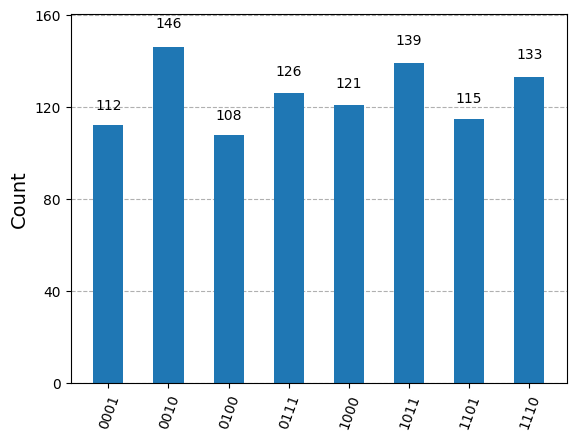

In [65]:
print('Circuit:')
display(qc.draw(reverse_bits=True))

print('Result:',res,end='\n\n')

print('Histogram:')
plot_histogram(res)

3. Inverese circuit

In [71]:
# Original circuit

qc = QuantumCircuit(4)

qc.h(3)
qc.h(2)
qc.h(1)
qc.h(0)

qc.u(np.pi*2.5,    np.pi*2.5,   np.pi*2,   1)

qc.cx(0,1)
qc.cx(2,1)
qc.cx(3,2)

qc.barrier()

# Inversing the circuit

qc.cx(3,2)
qc.cx(2,1)
qc.cx(0,1)

qc.u(-1*np.pi*2.5, -1*np.pi*2, -1*np.pi*2.5, 1)
 
qc.barrier()
qc.h(3)
qc.h(2)
qc.h(1)
qc.h(0)

statevector = Statevector(qc)
x_inverse = Operator(qc).to_matrix()

print('Statevector:')
display(statevector.draw('latex'))

print('Circuit:')
display(qc.draw(reverse_bits=True, plot_barriers=False))

print('Output matrix:')
display(array_to_latex(x_inverse))


Statevector:


<IPython.core.display.Latex object>

Circuit:


┌───┐                                                  »
q_3: ┤ H ├───────────────────────────────■─────■────────────»
     ├───┤                             ┌─┴─┐ ┌─┴─┐          »
q_2: ┤ H ├──────────────────────────■──┤ X ├─┤ X ├──■───────»
     ├───┤┌─────────────────┐┌───┐┌─┴─┐└───┘ └───┘┌─┴─┐┌───┐»
q_1: ┤ H ├┤ U(5π/2,5π/2,2π) ├┤ X ├┤ X ├───────────┤ X ├┤ X ├»
     ├───┤└─────────────────┘└─┬─┘└───┘           └───┘└─┬─┘»
q_0: ┤ H ├─────────────────────■─────────────────────────■──»
     └───┘                                                  »
«                            ┌───┐
«q_3: ───────────────────────┤ H ├
«                            ├───┤
«q_2: ───────────────────────┤ H ├
«     ┌────────────────────┐ ├───┤
«q_1: ┤ U(-5π/2,-2π,-5π/2) ├─┤ H ├
«     └────────────────────┘ ├───┤
«q_0: ───────────────────────┤ H ├
«                            └───┘

Output matrix:


<IPython.core.display.Latex object>

We flipped the order of the gates, and found that the U-gate had to be inversed. We looked at the conjugated and transformed version of the matrix concluding that $\phi$ and $\lambda$ had to be negative and change place. Due to the negativity of sin when flipping the matrix, $\theta$ had to be negative. Having a negative $\theta$ would not affect the value of cos.

We also found that qiskit had a method for inversing a circuit, and we used this to doublecheck our result.

In [70]:
qc = QuantumCircuit(4)

qc.h(3)
qc.h(2)
qc.h(1)
qc.h(0)

qc.u(np.pi*2.5,    np.pi*2.5,   np.pi*2,   1)

qc.cx(0,1)
qc.cx(2,1)
qc.cx(3,2)

qx = qc.inverse()
print("Inversed circuit using qiskit's method:")
qx.draw(reverse_bits=True)

Inversed circuit using qiskit's method:


┌───┐                                
q_3: ──■──┤ H ├────────────────────────────────
     ┌─┴─┐└───┘┌───┐                           
q_2: ┤ X ├──■──┤ H ├───────────────────────────
     └───┘┌─┴─┐├───┤┌────────────────────┐┌───┐
q_1: ─────┤ X ├┤ X ├┤ U(-5π/2,-2π,-5π/2) ├┤ H ├
          └───┘└─┬─┘└───────┬───┬────────┘└───┘
q_0: ────────────■──────────┤ H ├──────────────
                            └───┘

### 1.2 Quantum State Tomography

1. Implementing circuit in Qiskit

In [76]:
qc = QuantumCircuit(1)
qc.x(0)
qc.h(0)
qc.tdg(0)
qc.z(0)
qc.y(0)
qc.rx(theta=1.6,qubit=0)
qc.s(0)
print('Circuit:')
display(qc.draw(reverse_bits=True))

Circuit:


┌───┐┌───┐┌─────┐┌───┐┌───┐┌─────────┐┌───┐
q: ┤ X ├┤ H ├┤ Tdg ├┤ Z ├┤ Y ├┤ Rx(1.6) ├┤ S ├
   └───┘└───┘└─────┘└───┘└───┘└─────────┘└───┘

2. Retrieve statevector

In [77]:
statevector = Statevector(qc)
print('Statevector:')
display(statevector.draw('latex'))

Statevector:


<IPython.core.display.Latex object>

3. Apply measurements

In [122]:
def create_circuit():
    qc = QuantumCircuit(1,1)
    qc.x(0)
    qc.h(0)

    qc.tdg(0)
    qc.z(0)
    qc.y(0)
    qc.rx(theta=1.6,qubit=0)
    qc.s(0)

    return qc

z_basis = create_circuit()
print('Circuit:')
display(z_basis.draw(reverse_bits=True))

Circuit:


┌───┐┌───┐┌─────┐┌───┐┌───┐┌─────────┐┌───┐
  q: ┤ X ├┤ H ├┤ Tdg ├┤ Z ├┤ Y ├┤ Rx(1.6) ├┤ S ├
     └───┘└───┘└─────┘└───┘└───┘└─────────┘└───┘
c: 1/═══════════════════════════════════════════

Z-basis (0,1)

In [121]:
z_basis = create_circuit() # z-basis is the standard basis
z_basis.measure(0,0)
print('Circuit:')
display(z_basis.draw(reverse_bits=True))

Circuit:


┌───┐┌───┐┌─────┐┌───┐┌───┐┌─────────┐┌───┐┌─┐
  q: ┤ X ├┤ H ├┤ Tdg ├┤ Z ├┤ Y ├┤ Rx(1.6) ├┤ S ├┤M├
     └───┘└───┘└─────┘└───┘└───┘└─────────┘└───┘└╥┘
c: 1/════════════════════════════════════════════╩═
                                                 0

X-basis (+,-)

In [ ]:
x_basis = create_circuit()
x_basis.h() # turn from standard basis to x-basis
x_basis.measure(0,0)
print('Circuit:')
display(x_basis.draw(reverse_bits=True))

Y-basis (R,L)

In [ ]:
y_basis = create_circuit()
y_basis.s() # turn from standard basis to y-basis
y_basis.measure(0,0)

In [96]:
print('Statevector:')
display(statevector.draw('latex'))
qc.
res = measure(qc, shots=1000)

Statevector:


<IPython.core.display.Latex object>

In [103]:
print('Statevector:')
display(statevector.draw('latex'))

print('Output matrix:')
display(array_to_latex(x_inverse))

print('Result:',res)
display(qc.draw(reverse_bits=True))
plot_histogram(res)
i=1j


Statevector:


<IPython.core.display.Latex object>

Output matrix:


<IPython.core.display.Latex object>

Result: {'0': 131, '1': 869}


┌───┐┌───┐┌─────┐┌───┐┌───┐┌─────────┐┌───┐ ░ ┌─┐
     q: ┤ X ├┤ H ├┤ Tdg ├┤ Z ├┤ Y ├┤ Rx(1.6) ├┤ S ├─░─┤M├
        └───┘└───┘└─────┘└───┘└───┘└─────────┘└───┘ ░ └╥┘
meas: 1/═══════════════════════════════════════════════╩═
                                                       0

4. Reconstruct state from measurments